In [44]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.randn(200,1)

#y=0.8x^2 + 0.9x + 2

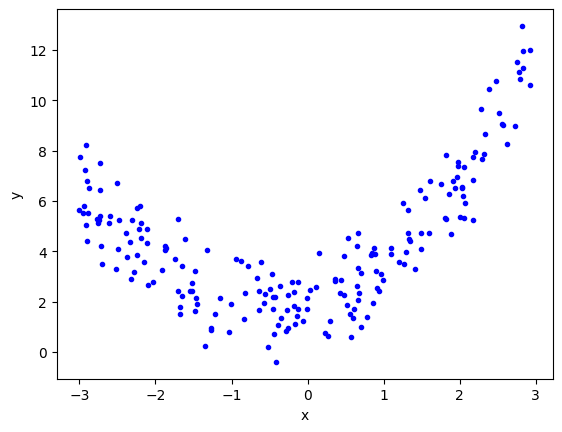

In [6]:
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Applying linear regression

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.2068568022079914

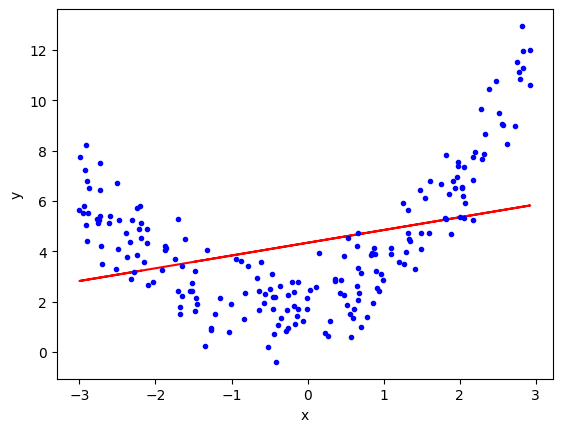

In [19]:
plt.plot(x_train,lr.predict(x_train),c='r')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Applying polynomial Linear Regression degree 2

In [25]:
poly=PolynomialFeatures(degree=2) #if include_bias=False then no x^0  # apply only to input features

x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.fit_transform(x_test)

In [24]:
print(x_train[0])
print(x_train_trans[0])   # x^0 , x^1, x^2

[-1.48089766]
[ 1.         -1.48089766  2.19305788]


In [26]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [27]:
y_pred=lr.predict(x_test_trans)

In [28]:
r2_score(y_test,y_pred)

0.8490846301976591

In [29]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8494829  0.80495888]]
[1.90258499]


In [30]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

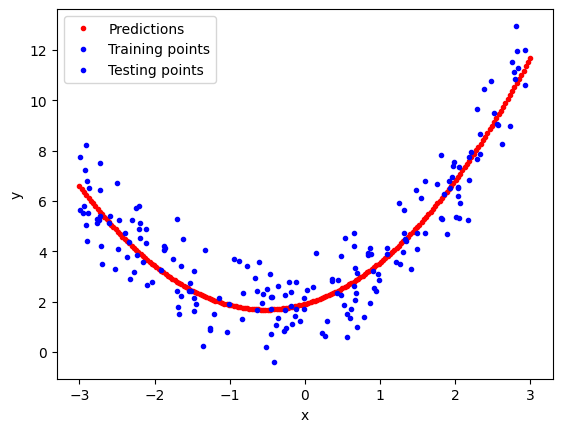

In [33]:
plt.plot(x_new,y_new,'r.',linewidth=2,label='Predictions')
plt.plot(x_train,y_train,'b.',label='Training points')
plt.plot(x_test,y_test,'b.',label='Testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 3D polynimial regression

In [34]:
y=7*np.random.rand(100,1) - 2.8
x=7*np.random.rand(100,1) - 2.8
z=x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)

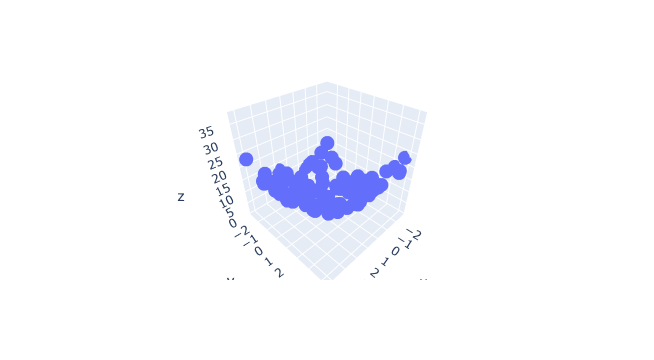

In [38]:
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [42]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input=np.linspace(x.min(),x.max(),10)
y_input=np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(x_input,y_input)
final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final=lr.predict(final).reshape(10,10)

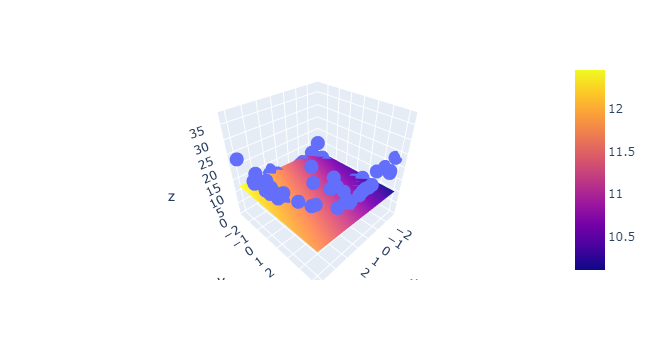

In [45]:
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()

In [46]:
x_multi=np.array([x,y]).reshape(100,2)
x_multi.shape

(100, 2)

In [54]:
poly=PolynomialFeatures(degree=5)
x_multi_trans=poly.fit_transform(x_multi)

In [55]:
print('input',poly.n_features_in_)
print('output',poly.n_output_features_)
print('powers\n',poly.powers_)

input 2
output 21
powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]]


In [56]:
lr=LinearRegression()
lr.fit(x_multi_trans,z)

LinearRegression()

In [57]:
x_test_multi=poly.transform(final)

In [58]:
z_final=lr.predict(x_multi_trans).reshape(10,10)

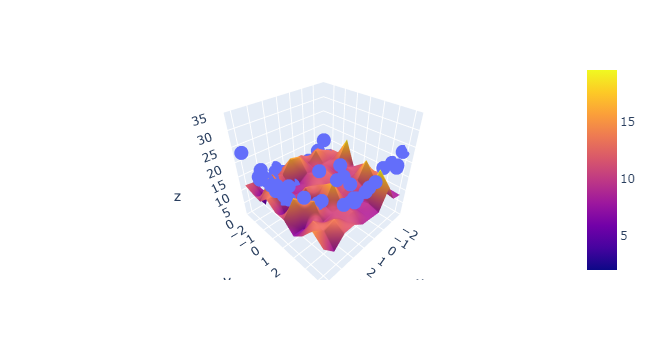

In [59]:
fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0,35])))
fig.show()